# Numpy基础：数组和矢量计算

[link->](https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12282042.0.0.1b9d2042KqU5ZQ&postId=5977)

参考  
作者：SeanCheney  
链接：https://www.jianshu.com/p/a380222a3292  
來源：简书  

《利用Python进行数据分析·第2版》 第4章  
[apachecn github](https://github.com/apachecn/pyda-2e-zh)

In [52]:
import numpy as np

# 高效
nparr=np.arange(1000000)
arr=list(range(1000000))

%time for _ in range(10): nparr2 = nparr * 2
%time for _ in range(10): arr2 = [x*2 for x in arr]


CPU times: user 6.15 ms, sys: 19.6 ms, total: 25.8 ms
Wall time: 25.7 ms
CPU times: user 521 ms, sys: 168 ms, total: 689 ms
Wall time: 689 ms


%time是ipython的语法 测量一行代码执行的时间  
Jupyter Notebook当然是可以用的，pycharm里的python环境也是jupyter Notebook的）

%timeit可以测量一行代码多次执行的时间  
[%time](https://blog.csdn.net/qq_38992914/article/details/101368674)

## NumPy的ndarray：一种多维数组对象

是一个多维数组对象，大数据容器。能够让数组像标量一样进行运算

https://numpy.org/doc/1.18/reference/random/legacy.html#simple-random-data

In [53]:
import numpy as np

data = np.random.randn(2,3)
print(data)
print(data*10)
print(data + data)
print(
    data.shape, #形状
    data.dtype, #数据类型
    data.ndim, #维度
)

[[ 1.90889544  1.05001267 -1.3812229 ]
 [ 0.29867025 -1.45567922  0.34829706]]
[[ 19.0889544   10.50012674 -13.81222904]
 [  2.98670255 -14.55679217   3.48297058]]
[[ 3.81779088  2.10002535 -2.76244581]
 [ 0.59734051 -2.91135843  0.69659412]]
(2, 3) float64 2


### 1.1.1 创建ndarray

In [54]:
import numpy as np
# 1 从原生数组创建
nparr=np.array([[1,2,3,4],[1,2,3,4]]) #如果没有对齐的话会被存为对象
print(nparr)
# 2 创建并初始化
print(np.zeros((3,2,5),dtype=np.int32))
print(np.ones((2,3),dtype=np.int32))
print(np.empty((2,3),dtype=np.int32))
# 3 arange
print(np.arange(16))


[[1 2 3 4]
 [1 2 3 4]]
[[[0 0 0 0 0]
  [0 0 0 0 0]]

 [[0 0 0 0 0]
  [0 0 0 0 0]]

 [[0 0 0 0 0]
  [0 0 0 0 0]]]
[[1 1 1]
 [1 1 1]]
[[1 1 1]
 [1 1 1]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


| 函数               | 说明 |
| ------------------ | -------- |
| array              | 转换数组 元组为ndarray 指定dtype 复制的 |
| asarray            | 将输入转换为ndarray 如果是ndarray不转换 |
| arange             | 类似range |
| ones,ones_like     | 指定形状和dtype创建ndarray \_like根据输入数据形状创建 |
| zeros,zeros_like   | 同上 |
| emptys,emptys_like | 同上 |
| fulls,fulls_like   | 同上 fulls数据类型和value相同 \_like类型和like对象相同 |
| eye,identity       | 方形矩阵 |


### 1.1.2 ndarray的数据类型

| 类型 | 代码 | 说明 |
| -------- | -------- | -------- |
| int8/uint8    | i1/u1   | 1byte整数  |
| int16/uint16  | i2/u2   | 2byte整数  |
| int32/uint32  | i4/u4   | 4byte整数  |
| int64/uint64  | i8/u8   | 8byte整数  |
| float16       | f2      | 半精度浮点  |
| float16       | f4/f    | 标准单精度浮点 float |
| float16       | f8/d    | 标准双精度浮点 double |
| float128      | f16/g   | 扩展精度浮点  |
| complex64/complex128/complex256 | c8/c16 | 用2个32/64/128位浮点数表示的复数 |
| bool          | ?       | 布尔 |
| object        | O       | python对象 |
| string_       | S       | 定长字符串 需要指定长度 如S10 |
| unicode_      | U       | 定长unicode 字节数由平台决定 需要指定长度 如U10 |

In [55]:
import numpy as np
# 类型转换
arr=np.array([1.,2,3,4])
print(arr.dtype,arr.astype(np.int8).dtype)
arr=np.array(['1.','2.33','3','4'])
print(arr.dtype)
print(arr.astype(np.float32),arr.astype(float))
print(arr.astype(dtype='d'))

float64 int8
<U4
[ 1.          2.32999992  3.          4.        ] [ 1.    2.33  3.    4.  ]
[ 1.    2.33  3.    4.  ]


### 1.1.3 NumPy数组的运算

In [56]:
import numpy as np
arr=np.random.randn(2,3)
print(arr)
print(arr*2)
print(arr/3-arr)
print(1/arr)
print(arr ** 5)#幂
print(arr**3 >arr)#bool

[[ 0.68967785  1.31889915 -0.28561654]
 [ 1.38016394  0.41486153 -1.85975814]]
[[ 1.3793557   2.6377983  -0.57123307]
 [ 2.76032787  0.82972305 -3.71951628]]
[[-0.45978523 -0.8792661   0.19041102]
 [-0.92010929 -0.27657435  1.23983876]]
[[ 1.44995232  0.75820809 -3.50119784]
 [ 0.72455161  2.41044285 -0.53770433]]
[[  1.56038364e-01   3.99078140e+00  -1.90071387e-03]
 [  5.00787381e+00   1.22889790e-02  -2.22475575e+01]]
[[False  True  True]
 [ True False False]]


### 1.1.4 数组的广播
- 从最小的维度开始匹配，数据长度必须为1或者相等
- ndim小的数组追加长度为1的维度，该数据扩展到该维度其他数据上的计算

In [57]:
import numpy as np
arr = np.array([
    [
        [1,2,3],[4,5,6]
    ],[
        [11,12,13],[14,15,16]
    ]
])

print(arr+[1,2,3])
# print(arr+[1,2])#error
print(arr+[[1],[2]])
# print(arr+[[[1],[2]],[[100,200,300],[]]])#结构不一样的不会被识别为相同类型
print(arr+[[[100,200,300]],[[400,500,600]]])#最里面的一维数组会展开
print(arr+[[100,200,300],[400,500,600]])#自动展开中间一层 结果一样

[[[ 2  4  6]
  [ 5  7  9]]

 [[12 14 16]
  [15 17 19]]]
[[[ 2  3  4]
  [ 6  7  8]]

 [[12 13 14]
  [16 17 18]]]
[[[101 202 303]
  [104 205 306]]

 [[411 512 613]
  [414 515 616]]]
[[[101 202 303]
  [404 505 606]]

 [[111 212 313]
  [414 515 616]]]


### 1.1.5 基本的索引和切片

In [58]:
import numpy as np
arr = list(range(5))

print(arr)
# arr[2:4]=3 #error
# print(arr)

nparr=np.arange(5)
nparr[2:4]=3
print(nparr)


arr_s=arr[2:4] # 有拷贝的
arr_s[1]=666
print("arr",arr,"arr_s",arr_s)
nparr_s=nparr[2:4] # 无拷贝的索引到原数组
nparr_s[1]=6666
print("nparr",nparr,"nparr_s",nparr_s)
nparr_s[:]=233 #修改原数组被切片的片段
print(nparr)
nparr_p=nparr[2:4].copy()#复制数据

# 多维数据
print("# 2维数据")
a2d = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
# print(a2d[1][2],a2d[1,2]) # 原始的数组不能使用,索引
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr2d[1][2],arr2d[1,2])

print("# 3维数据")
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
old_values = arr3d[0].copy()
arr3d[0] = 42
print(arr3d,"<")
arr3d[0] = old_values # 数组对数组赋值
print(arr3d,"<")
arr3d[1,0]=222
print(arr3d,"<")

[0, 1, 2, 3, 4]
[0 1 3 3 4]
arr [0, 1, 2, 3, 4] arr_s [2, 666]
nparr [   0    1    3 6666    4] nparr_s [   3 6666]
[  0   1 233 233   4]
# 2维数据
6 6
# 3维数据
[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]] <
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]] <
[[[  1   2   3]
  [  4   5   6]]

 [[222 222 222]
  [ 10  11  12]]] <


### 1.1.6 切片索引

In [59]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr2d[:2, 1:])
print(arr2d[1,:2])
print(arr2d[1:2,:2])
print(arr2d[:2,1])
print(arr2d[:2,1:2])# 使用:切片会保留数组维度，使用索引的话会被直接取值

[[2 3]
 [5 6]]
[4 5]
[[4 5]]
[2 5]
[[2]
 [5]]


### 1.1.7 布尔型索引

In [60]:
import numpy as np
arr = np.random.randn(3,4)
print(arr[[True,False,True]])
# print(arr[[True,False,True,True]]) # 报错布尔数组长度的数据0维度的长度不同

names = np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
data = np.random.randn(7,4)
print(data[names=='Joe'])

#布尔索引加切片和整数索引
print('布尔索引加切片和整数索引')
print(data[names=='Joe',2:])
print(data[names=='Joe',3])

print('!= ~')
print(data[names!='Joe'])
print(data[~ (names=='Joe')])

#布尔数组和布尔运算 & |
print((names == 'Bob') | (names == 'Will'))

## 使用布尔索引总是创建副本
print('布尔索引创建副本')
jarr=data[names == 'Joe']
jarr[:] = 0
print(data,'<')
print(jarr,'<')

## 使用布尔索引过滤到item
parr = data[data<0] # 赋值出去 索引操作在等号右边到会产生副本
parr[:] = 0 # 被赋值 索引操作在等号左边 会修改内部数据
print(parr)
print(data)
#二维布尔索引
data[data<0] = 0 # 被赋值 索引操作在等号左边 会修改内部数据
#一维布尔索引
data[names != 'Joe'] = 7
print(data)
#而且哪种赋值表达式都不能直接反正print里边
# print(parr = data[data<0])
# print(data[data<0] = 0)



[[-0.44836632 -0.13296173 -0.68318744  2.46763793]
 [-0.82046893 -0.83866652 -0.86464667 -0.36347907]]
[[ 0.1925472   1.32672087 -0.5988056  -0.11676674]
 [-0.51021993  1.34238386 -1.55932     1.4995274 ]
 [ 1.62977577  1.16553271 -1.29970672 -0.80649458]]
布尔索引加切片和整数索引
[[-0.5988056  -0.11676674]
 [-1.55932     1.4995274 ]
 [-1.29970672 -0.80649458]]
[-0.11676674  1.4995274  -0.80649458]
!= ~
[[-1.08658046 -0.60647359  0.68881449 -0.12550207]
 [-1.34331543 -0.20758714 -0.29083158  0.15194384]
 [ 1.12541315  1.05830722 -0.73351227 -0.68456761]
 [-0.36383937  0.43185585  1.04685563 -0.24124147]]
[[-1.08658046 -0.60647359  0.68881449 -0.12550207]
 [-1.34331543 -0.20758714 -0.29083158  0.15194384]
 [ 1.12541315  1.05830722 -0.73351227 -0.68456761]
 [-0.36383937  0.43185585  1.04685563 -0.24124147]]
[ True False  True  True  True False False]
布尔索引创建副本
[[-1.08658046 -0.60647359  0.68881449 -0.12550207]
 [ 0.1925472   1.32672087 -0.5988056  -0.11676674]
 [-1.34331543 -0.20758714 -0.29083158  0

## 1.1.8 花式索引
用整数数组索引  
数据是复制的

In [61]:
import numpy as np

arr = np.array(
[[x+y for x in range(4)] for y in range(0,80,10)]
)

#指定列表用来排序
print(arr[[4,6,-3]],'<')#选择行并排序
print(arr[:,[2,1,-3]],'<')#选择列并排序
# print(list(range(10))[[4,3,-1]]) #普通数组是不行的
print(arr[
    [7,5,3,1],#第0维
    [0,3,2,1] #第1维
],'<')# 索引内使用并列的数组并不是对两个维度进行排序，而是分别指定两个维度的索引取item

#只有[:,[xxx]]的语法才是对列排序
# *没有办法在一个操作内同时对行和列进行索引排序吗*

print(
    arr[[1,5,7,2]]#选择行并排序
    [:,[0,3,1,2]]#选择列并排序
)
#索引操作是产生副本

a=np.arange(10) #切片操作是产生窗口
b=a[3:5]
b[:]=-10
print(a)
print(b)

[[40 41 42 43]
 [60 61 62 63]
 [50 51 52 53]] <
[[ 2  1  1]
 [12 11 11]
 [22 21 21]
 [32 31 31]
 [42 41 41]
 [52 51 51]
 [62 61 61]
 [72 71 71]] <
[70 53 32 11] <
[[10 13 11 12]
 [50 53 51 52]
 [70 73 71 72]
 [20 23 21 22]]
[  0   1   2 -10 -10   5   6   7   8   9]
[-10 -10]


## 1.1.9 数组转置和轴对换

In [62]:
import numpy as np

arr = np.array([np.arange(x,x+5) for x in range(0,30,10)])
print(arr,'<')

#使用trnspose方法
# print(np.transpose(arr),'<')
print(arr.transpose,'<')
#使用T属性
print(arr.T,'<')
#np.dot()方法 点乘/内积
print(np.dot(arr.T,arr),'<')

#高维数组转置 需要指定由轴编号组成的元组
arr = np.arange(24).reshape((2,3,4))
print(arr,'<')
print(arr.transpose((1,0,2)),'<trans')# 对应旧轴的顺序
# print(arr.T,'<')#这两个是等价的 把轴做一次倒序
# print(arr.transpose(2,1,0),'<')#这两个是等价的

#swapaxes()方法 交换轴
print(arr.swapaxes(1,0),'<swap')#顺序没有关系 只能交换两轴

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]] <
<built-in method transpose of numpy.ndarray object at 0x7f972937fcb0> <
[[ 0 10 20]
 [ 1 11 21]
 [ 2 12 22]
 [ 3 13 23]
 [ 4 14 24]] <
[[500 530 560 590 620]
 [530 563 596 629 662]
 [560 596 632 668 704]
 [590 629 668 707 746]
 [620 662 704 746 788]] <
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]] <
[[[ 0  1  2  3]
  [12 13 14 15]]

 [[ 4  5  6  7]
  [16 17 18 19]]

 [[ 8  9 10 11]
  [20 21 22 23]]] <trans
[[[ 0  1  2  3]
  [12 13 14 15]]

 [[ 4  5  6  7]
  [16 17 18 19]]

 [[ 8  9 10 11]
  [20 21 22 23]]] <swap


## 1.2 通用函数：快速的元素级数组函数
通用函数ufunc对ndarray的数据进行元素级运算  
呃 一般函数的矢量化包装器 呃 没啥说的

In [63]:
## import numpy as np
# 一元的
arr = np.arange(4)
print(np.sqrt(arr),'<1')
print(np.exp(arr),'<2') #e为底数

#二元的
x=np.random.randn(4)
y=np.random.randn(4)
print(np.maximum(x,y),'<3')

#返回多个数组的
arr = np.random.randn(4)*5
remainder,whole_part = np.modf(arr)
print(remainder,'<remainder')
print(whole_part,'<whole_part')

#接受一个out参数获取结果
print(arr)
oarr=np.ones((3,4),dtype=arr.dtype)
np.sqrt(np.abs(arr),oarr)#输入小于0会有提醒 要满足广播条件(shape/dtype)
print(oarr,'<oarr')


[ 0.          1.          1.41421356  1.73205081] <1
[  1.           2.71828183   7.3890561   20.08553692] <2
[ 1.07277901  1.3228742   1.04327218  1.13463556] <3
[-0.2762862   0.17136474 -0.99398618 -0.256801  ] <remainder
[-3.  1. -1. -5.] <whole_part
[-3.2762862   1.17136474 -1.99398618 -5.256801  ]
[[ 1.81005144  1.08229605  1.41208575  2.29277147]
 [ 1.81005144  1.08229605  1.41208575  2.29277147]
 [ 1.81005144  1.08229605  1.41208575  2.29277147]] <oarr



link

**一元ufunc**

| 函数      | 说明     |
| --------  | -------- |
| fabs/fabs | 计算整数 浮点数(复数)绝对值 |
| sqrt      | 开方 (arr**0.5) |
| square    | 平方 (arr**2)   |
| exp       | 计算e的指数     |
| log/log10/log2/log1p | loge() log10() log2() loge(1+x) |
| sign       | 获取负号 (1,0,-1) |
| ceil       | 向上取整    |
| floor      | 向下取整    |
| arccos/arcconh/arcsin/arcsinh/arctan/arctanh | 反三角函数  |
| logical_not       | 逻辑非???   |

**二元ufunc**

| 函数      | 说明     |
| --------  | -------- |
| add       | 相加     |
| subtract  | 相减     |
| multiply  | 元素相乘 |
| divide/floor_fivide | 除法/向下取整 |
| power     | 幂运算   |
| maximum/fmax | 最大值 fmax忽略NaN   |
| minimum/fmin | 最小值 fmin忽略NaN   |
| mod       | 取模     |
| copysign  | 将后面数组的负号付给前面的数组 |

## 1.3 利用数组进行数据处理

Text(0.5,1,'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

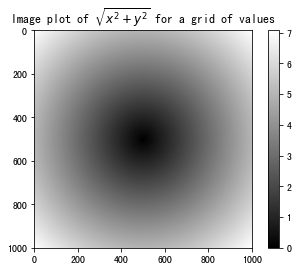

In [8]:
import numpy as np

points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
# 相当于执行两次arange产生x[]/y[]数据，增长方向不一样
# print(xs,"<")
# print(xy,"<")
z=np.sqrt(xs ** 2 + ys ** 2)

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(z,cmap=plt.cm.gray);
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

### 1.3.1 将条件逻辑表述为数组运算

In [27]:
import numpy as np
xarr = np.arange(1,1.5,0.1)
yarr = np.arange(1,1.5,0.1)
cond = np.array([True,False,True,True,False])

result = [(x if c else y)
    for x,y,c in zip(xarr,yarr,cond)] #转换为一般数组处理
print(result)
# zip可以将两个数组打包为数据对的组元数组

# 使用where矩阵运算
print(np.where(cond, xarr, yarr))

arr=np.random.randn(4,4)
print(arr)
print(np.where(arr>0,2,-2))
print(np.where(arr>0,2,arr))#可以是数组或者标量
print(np.where(arr>0,2,[1,2,3,4])) #满足广播规则就可

[1.0, 1.1000000000000001, 1.2000000000000002, 1.3000000000000003, 1.4000000000000004]
[ 1.   1.1  1.2  1.3  1.4]
[[-1.26963742 -0.46019919 -0.50855917 -1.97848978]
 [-0.02568585 -1.42644313 -0.55978733 -0.51710313]
 [ 0.22593783 -0.98417802 -0.49862428  0.24970783]
 [-1.7386752   1.10829109  0.69733935  2.3717413 ]]
[[-2 -2 -2 -2]
 [-2 -2 -2 -2]
 [ 2 -2 -2  2]
 [-2  2  2  2]]
[[-1.26963742 -0.46019919 -0.50855917 -1.97848978]
 [-0.02568585 -1.42644313 -0.55978733 -0.51710313]
 [ 2.         -0.98417802 -0.49862428  2.        ]
 [-1.7386752   2.          2.          2.        ]]
[[1 2 3 4]
 [1 2 3 4]
 [2 2 3 2]
 [1 2 2 2]]


## 1.3.2 数学和统计方法
sum/mean/std等聚合计算(统计)
可以当作数组实例方法调用，也可以当作顶级NumPy方法调用

In [37]:
arr = np.random.randn(5,4)
print(arr)
print(arr.mean())
print(np.mean(arr))
print(arr.sum())

# mean/sum等可以指定聚合计算的轴向
print(arr.mean(axis=1),"<")
print(arr.mean(axis=0))
print(arr.mean(0))

# cumsum/cumprod等不聚合的方法会产生由中间结果组成的数组
arr = np.array([[1,2,3],[4,5,6]])
print(arr.cumsum(),"<cumsum") #累加
print(arr.cumprod())#累积
# 指定维度返回的同样大小的数组，但是会根据每个低维的切片沿着标记轴计算部分聚类：
print(arr.cumsum(0))
print(arr.cumsum(1))

[[-0.43208026  0.87747801 -0.74046171 -1.01621012]
 [-0.3272143   1.0913625   0.46134183 -2.33021529]
 [ 1.66555389 -1.09570807  1.66274146 -1.32274233]
 [ 1.74906789 -0.17369886 -0.03887682 -0.28694192]
 [ 0.2848899  -0.2701851   0.4783218  -0.10653487]]
0.00649438245506
0.00649438245506
0.129887649101
[-0.32781852 -0.27618132  0.22746124  0.31238757  0.09662293] <
[ 0.58804342  0.0858497   0.36461331 -1.0125289 ]
[ 0.58804342  0.0858497   0.36461331 -1.0125289 ]
[ 1  3  6 10 15 21] <cumsum
[[1 2 3]
 [5 7 9]]
[[ 1  3  6]
 [ 4  9 15]]
[  1   2   6  24 120 720]


表4-5:级别数组统计方法


| 方法          | 说明 2 |
| ------------- | -------- |
| sum           | 求和 全部或轴向        |
| mean          | 算术平均数             |
| std/var       | 方差/标准差 自由度可调 |
| mini/max      | 最大值和最小值         |
| argmin/argmax | 最大/最小元素索引      |
| cunsum        | 累加      |
| cumrod        | 累积      |



## 1.3.3 列出了全部的基本数组统计方法

In [2]:
import numpy as np
#利用布尔值计数
arr = np.random.randn(100)
print((arr > 0).sum())

#any 包含true检测
arr = np.array([False,False,True,False])
print(arr.any())
print(arr.all())

56
True
False


## 1.3.4 排序

| 种类                | 速度 | 最坏情况      | 工作空间 | 稳定性 |
| ------------------- | ---- | ------------- |-------- |------- |
| 'quicksort'(快排)     | 1    | O(n^2)        | 0    |否     |
| 'mergesote'(归并排序) | 2    | O(n\*long(n)) | ~n/2 |是     |
| 'heapsote'(堆排序)    | 3    | O(n\*log(n))  | 0    |否     |

返回输入数组排序的副本
numpy.sort(a,axis,kind,order)

- a 输入数组
- axis 沿着指定轴向排序 如果没有数组会被展开，沿着最后的轴排序 //什么意思
- kind 默认为'quicksort'
- order 指定对某个字段排序


In [24]:
import numpy as np

a = np.array([[3,7],[9,1]])
print(a)
print(np.sort(a))
print(np.sort(a,axis=0),"<延0轴")
dt = np.dtype([('name','S10'),('age',int)]) #使用组元定义每个字段的名字和类型
a = np.array([('raju',21),('anil',25),('favi',17),('amar',27)],dtype = dt)
# print(dt, a.dtype,type(a[0][0]),type(a[0][1]))
# numpy里的字符串(Sn)是按np.bytes_存储的
print(a)
print(np.sort(a,order = "name"),'<按name字段排序')

arr = np.random.randint(0,100,size=(3,5))
print(arr)
arr.sort(1)
print(arr,'直接修改数据')

[[3 7]
 [9 1]]
[[3 7]
 [1 9]]
[[3 1]
 [9 7]] <延0轴
[('name', 'S10'), ('age', '<i8')] [('name', 'S10'), ('age', '<i8')] <class 'numpy.bytes_'> <class 'numpy.int64'>
[(b'raju', 21) (b'anil', 25) (b'favi', 17) (b'amar', 27)]
[(b'amar', 27) (b'anil', 25) (b'favi', 17) (b'raju', 21)] <按name字段排序


In [54]:
import numpy as np
# numpy.argsort() 指定轴间接排序
# 返回排序后的索引
x = np.random.randint(0,100,size=(3,5))
y = np.argsort(x)
print(x,'<x')
print(y,'<y')
# print(x[y]) 原例子里一维数组对一维数组可以直接取值
# for index,item in enumerate(x):
#     print(item[y[index]])
print( np.array([item[y[index]]  for index,item in enumerate(x)]) )

[[ 2 97 83  1 18]
 [12 79 91 86 61]
 [86 48 37  4 76]] <x
[[3 0 4 2 1]
 [0 4 1 3 2]
 [3 2 1 4 0]] <y
[[ 1  2 18 83 97]
 [12 61 79 86 91]
 [ 4 37 48 76 86]]


In [47]:
import numpy as np
# numpy.lexsort() 键序列间接排序 最后一个键是主键
nm = ('raju','anil','raiv','amar') #主键
dv = ('f.y','s.y','s.y','f.y')
ind = np.lexsort((dv,nm))
print(ind)
print([nm[i] + ',' + dv[i] for i in ind])

[3 1 2 0]
['amar,f.y', 'anil,s.y', 'raiv,s.y', 'raju,f.y']


## 1.3.5 唯一化以及其它的集合逻辑

In [3]:
import numpy as np

#np.unique() 找出唯一的数据并排序
names = np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
print(np.unique(names),'<unique')
ints = np.array([3,3,3,2,2,1,1,4,4])
print(np.unique(ints),'<unique')
print(sorted(set(names)),'sorted set')

#np.in1d() 测试亿数组在另一数组的包含关系 返回布尔数组
values = np.array([6,0,0,3,2,5,6])

print(np.in1d(values,[2,3,6]),'<in1d')


['Bob' 'Joe' 'Will'] <unique
[1 2 3 4] <unique
['Bob', 'Joe', 'Will'] sorted set
[ True False False  True  True False  True] <in1d


表4-6:数组的集合运算


| 方法 | 说明 |
| -------- | -------- |
| unique(x) | 计数x中的的唯一元素并返回有序结果 |
| intersect1d(x,y) | 交集 返回有序结果      |
| union1d(x,y)     | 并集 返回有序结构结果  |
| in1d(x,y)      | 检查x每项元素包含于y     |
| setdiff1d(x,y) | 集合的差 x不在y中的元    |
| setxor1d(x,y   | 集合对称差 仅存在两集合的其中之一的元素 |

# 1.4 用于数组的文件输入输出
- 查看个人空间的内容 !ls /home/tianchi/myspace  
https://tianchi.aliyun.com/mas-notebook/preview/5/82551b50-7d1d-11e9-a9e9-6559858e5766.ipynb/1095279474052#%E5%AD%98%E5%82%A8%E8%B5%84%E6%BA%90


In [32]:
import sys
import os

# sys/os test
path = sys.argv[0]
if os.path.isdir(path):#运行路径
    print(path)
elif  os.path.isfile(path):#py2exe编译后的文件
    print(os.path.dirname(path))

print(os.getcwd())#脚本运行目录
print(os.path.abspath('.'))
print(os.curdir)
print(os.path.abspath(os.curdir)) #额...

#os.chdir(path)改变工作路径
#os.system('cls')

e:\users\lgame\appdata\local\programs\python\python36\lib\site-packages
D:\Note\笔记整理\note-2020-03-18-tianchi\note-2020-03-18-numpy
D:\Note\笔记整理\note-2020-03-18-tianchi\note-2020-03-18-numpy
.
D:\Note\笔记整理\note-2020-03-18-tianchi\note-2020-03-18-numpy


In [2]:
import numpy as np
import os

prefix = './files/'
arr = np.arange(10)
#np.save() 保存未压缩的原始二进制数据
# np.save('some_array',arr)
np.save(prefix+'some_array',arr)#未压缩的原始二进制数据

# !ls
# !dir

print(np.load(prefix+"some_array.npy"),'<load')
#np.savez() 通过关键字参数保存多个数据
np.savez(prefix+"array_archive",a=arr,b=[arr,arr])
print(np.load(prefix+"array_archive.npz")['b'],'load-savez')

np.savez_compressed(prefix+'arrays_sompressed.npz',a=2,b=arr)
print(np.load(prefix+"arrays_sompressed.npz")['a'],'<load-savez_compressed')


[0 1 2 3 4 5 6 7 8 9] <load
[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]] load-savez
2 <load-savez_compressed


# 1.5 线性代数
np的*运算是元素运算而不是矩阵点积  
点积应使用np.dot(x,y)
或者使用@运算符计算点积

In [64]:
import numpy as np
x= np.array([[1,2,3],[4.,5.,6.]])
y= np.array([[6.,23.],[-1,7],[8,9]])
print(x.dot(y))
print(y.dot(x))
# print(np.dot(x,y))

print(np.ones(3),'<ones')
print(np.dot(x,np.ones(3)))

print(x @ np.ones(3),'<@')

[[ 28.  64.]
 [ 67. 181.]]
[[ 98. 127. 156.]
 [ 27.  33.  39.]
 [ 44.  61.  78.]]
[1. 1. 1.] <ones
[ 6. 15.]
[ 6. 15.] <@


numpy.linal线性代数运算库，于MATLAB R语言相同标准，用于计算矩阵分解 逆矩阵等  
如 BLAS/LAPACK/Inerl/MKL(Math Kernel Library)...

In [80]:
import numpy as np
from numpy.linalg import inv,qr
X=np.random.randint(0,50,(5,5))
mat=X.T.dot(X)
# print(X,'<X')
# print(X.T,'<X.T')
print(mat,"<mat")
print(inv(mat),'<inv(mat)')#逆矩阵
print(inv(inv(mat)),'<ing(inv(mat)')#逆矩阵
print(np.around(
    mat.dot(inv(mat)),
    decimals=2
),'<mat.dot(inv(mat))')

[[3542 1964 3609 3436 2721]
 [1964 2461 2805 2243 2933]
 [3609 2805 4419 3848 3754]
 [3436 2243 3848 3764 3463]
 [2721 2933 3754 3463 4699]] <mat
[[ 0.00458356 -0.00053132 -0.00114251 -0.00435596  0.00180042]
 [-0.00053132  0.0034867  -0.00279728  0.00288899 -0.001763  ]
 [-0.00114251 -0.00279728  0.00498888 -0.00291495  0.00057021]
 [-0.00435596  0.00288899 -0.00291495  0.00837459 -0.00312393]
 [ 0.00180042 -0.001763    0.00057021 -0.00312393  0.00211737]] <inv(mat)
[[3542. 1964. 3609. 3436. 2721.]
 [1964. 2461. 2805. 2243. 2933.]
 [3609. 2805. 4419. 3848. 3754.]
 [3436. 2243. 3848. 3764. 3463.]
 [2721. 2933. 3754. 3463. 4699.]] <ing(inv(mat)
[[ 1. -0.  0.  0. -0.]
 [ 0.  1. -0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [-0. -0. -0.  1. -0.]
 [-0.  0.  0.  0.  1.]] <mat.dot(inv(mat))


表4-7:常用numpy.linalg函数
| 函数 | 说明 |
| :--- | :--- |
| diag | 返回方阵的对角线或非对角线的一维数组,或将一维数组转为方阵 |
| dot | 点击 |
| trace | 对角线求和 |
| det | 矩阵行列式 |
| eig | 方阵本征值和本征向量 |
| inv | 方阵的逆 |
| pinv | Mooer-Penrose伪逆 |
| qu | QR分解 |
| svd | 奇异值分解 |
| solve | 求线性方阵 Ax=b |
| lstsq | 计算Ax=b的最小二阶解  |

- [行列式->](https://baike.baidu.com/item/%E8%A1%8C%E5%88%97%E5%BC%8F/2010180)
  描述一个线性变换对体积的影响
- [本征值和本征向量->](https://baike.baidu.com/item/%E7%89%B9%E5%BE%81%E5%80%BC/11034909)  
  一个矩阵在某个向量的情况下作用效果和某常量相同 Ax=mx  
  那么m是A的一个特征值,x是A在特征值m情况下的特征向量



In [109]:
import numpy as np
a2d = np.random.randint(0,80,(4,4))
a3d = np.random.randint(0,80,(4,4,4))

print(a2d,'<asd')
print(np.diag(a2d),'diag-2d')
print(np.diag([1,2,3,4]),'diag-1d')
print(a2d.dot(a2d.T),'<dot')
print(np.trace(a2d),'<trace')
print(np.linalg.det(a2d),'<det')
[w,v] = np.linalg.eig(a2d)
print(w,v)
# print(a2d@np.array(v),'<eig')
# print(w@np.array(v),'<eig')
# [w,v] = np.linalg.eig(a2d)
print(a2d@np.array(v),'<eig')
print(w@np.array(v),'<eig')

[[77 48 73 53]
 [ 8 64 49 55]
 [43 40  2 20]
 [18 57  4 38]] <asd
[77 64  2 38] diag-2d
[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]] diag-1d
[[16371 10180  6437  6428]
 [10180  9586  4102  6078]
 [ 6437  4102  3853  3822]
 [ 6428  6078  3822  5033]] <dot
181 <trace
-1453540.000000001 <det
[160.45817339  57.73342766 -41.01697723   3.82537618] [[-0.76419894 -0.83225721 -0.39177216  0.05616497]
 [-0.42906944  0.38624617 -0.4930902  -0.48081967]
 [-0.3565431  -0.255552    0.65876107 -0.32885789]
 [-0.32369184  0.3047212   0.41159504  0.81087017]]
[[-122.62196584  -48.04906125   16.06930965    0.21485216]
 [ -68.84769936   22.29931521   20.22506962   -1.8393161 ]
 [ -57.2102552   -14.75389309  -27.02038788   -1.25800514]
 [ -51.93900165   17.59259962  -16.88238449    3.10188343]] <eig
[-134.00753827  -99.59551209 -116.77671429   -2.1565982 ] <eig
